In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import time
import pickle
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [8]:
# from curl_cffi import requests
# session = requests.Session(impersonate="chrome")

In [9]:
# df=yf.Ticker("TCS.NS", session=session).history(period='5y')
# df=df.drop(["Dividends", "Stock Splits"], axis=1)
# df["Volume"] = df["Volume"].astype('int32')
# df[["Open", "High", "Low", "Close"]] = df[["Open", "High", "Low", "Close"]].astype('float32')
# df.reset_index(inplace=True)
# df["Date"] = df["Date"].dt.tz_localize(None)
# df.set_index("Date", inplace=True)

In [ ]:
# file_pattern = "../../data/NIFTY *.csv"
# csv_files = glob.glob(file_pattern)
# dfs = [pd.read_csv(file) for file in csv_files]
# nifty = pd.concat(dfs, ignore_index=True)
# nifty['Date '] = pd.to_datetime(nifty['Date '], format='%d-%b-%Y')
# nifty=nifty.sort_values(by='Date ')

# nifty.to_csv("../../data/NIFTY.csv", index=False)

In [4]:
FUTURE_WINDOW = 20

In [5]:
nifty=pd.read_csv("../../data/NIFTY.csv")
nifty['Date '] = pd.to_datetime(nifty['Date '])

In [6]:
nifty=nifty.rename(columns={
    'Date ':"Date" , 'Open ': 'Open', 'High ':"High", 'Low ':"Low", 'Close ':"Close",
})

In [7]:
nifty.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded ',
       'Turnover (₹ Cr)'],
      dtype='object')

In [8]:
with open('../../data/n200_5yr.pickle', 'rb') as f:
    data = pickle.load(f)

In [9]:
data

,Date,Open,High,Low,Close,Volume,Symbol
0,2019-02-18,1094.297363,1102.318848,1079.620972,1082.882446,29203,ABB
1,2019-02-19,1084.204834,1107.167114,1079.885620,1095.619873,60315,ABB
2,2019-02-20,1106.241333,1123.429932,1097.911499,1102.274780,70442,ABB
3,2019-02-21,1109.767334,1117.700439,1092.137939,1098.043701,55594,ABB
4,2019-02-22,1100.776245,1114.659424,1093.019287,1100.335571,55699,ABB
...,...,...,...,...,...,...,...
1230,2024-02-12,809.750000,863.349976,803.049988,856.650024,6951210,ZYDUSLIFE
1231,2024-02-13,856.000000,866.849976,844.849976,857.799988,1510782,ZYDUSLIFE
1232,2024-02-14,846.000000,872.000000,844.650024,867.799988,884541,ZYDUSLIFE
1233,2024-02-15,872.000000,885.000000,863.450012,878.950012,622903,ZYDUSLIFE


In [10]:
data=data.merge(nifty[["Close","Date"]], on="Date", how="left").rename(columns={"Close_y":"Nifty_Close","Close_x":"Close"})
data

,Date,Open,High,Low,Close,Volume,Symbol,Nifty_Close
0,2019-02-18,1094.297363,1102.318848,1079.620972,1082.882446,29203,ABB,10640.95
1,2019-02-19,1084.204834,1107.167114,1079.885620,1095.619873,60315,ABB,10604.35
2,2019-02-20,1106.241333,1123.429932,1097.911499,1102.274780,70442,ABB,10735.45
3,2019-02-21,1109.767334,1117.700439,1092.137939,1098.043701,55594,ABB,10789.85
4,2019-02-22,1100.776245,1114.659424,1093.019287,1100.335571,55699,ABB,10791.65
...,...,...,...,...,...,...,...,...
236254,2024-02-12,809.750000,863.349976,803.049988,856.650024,6951210,ZYDUSLIFE,21616.05
236255,2024-02-13,856.000000,866.849976,844.849976,857.799988,1510782,ZYDUSLIFE,21743.25
236256,2024-02-14,846.000000,872.000000,844.650024,867.799988,884541,ZYDUSLIFE,21840.05
236257,2024-02-15,872.000000,885.000000,863.450012,878.950012,622903,ZYDUSLIFE,21910.75


In [11]:
data["t+FW"] = data.groupby("Symbol")["Close"].shift(-FUTURE_WINDOW)

data["Close_pct_chg"] = data.groupby("Symbol")["Close"].pct_change().shift(-1)
data["Nifty_Close_pct_chg"]= data.groupby("Symbol")["Nifty_Close"].pct_change().shift(-1)
data["Volume_pct_chg"]= data.groupby("Symbol")["Volume"].pct_change().shift(-1)

data["Nifty_Close_pct_chg_FW"]= data.groupby("Symbol")["Nifty_Close"].pct_change(FUTURE_WINDOW).shift(-FUTURE_WINDOW)
data["Close_pct_chg_FW"] = data.groupby("Symbol")["Close"].pct_change(FUTURE_WINDOW).shift(-FUTURE_WINDOW)

In [12]:
data[["Date","Close_pct_chg", "Nifty_Close_pct_chg","Close_pct_chg_FW", "Nifty_Close_pct_chg_FW","Volume_pct_chg"]].head(35)

,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_FW,Nifty_Close_pct_chg_FW,Volume_pct_chg
0,2019-02-18,0.011762,-0.003440,0.074156,0.083775,1.065370
1,2019-02-19,0.006074,0.012363,0.077034,0.086446,0.167902
2,2019-02-20,-0.003838,0.005067,0.071571,0.067203,-0.210783
3,2019-02-21,0.002087,0.000167,0.071406,0.052308,0.001889
4,2019-02-22,-0.001402,0.008196,0.066210,0.064087,-0.339144
5,2019-02-25,-0.008664,-0.004118,0.064097,0.051925,1.415741
6,2019-02-26,-0.008659,-0.002644,0.064050,0.067806,1.511229
7,2019-02-27,0.001633,-0.001309,0.075711,0.079812,0.052615
8,2019-02-28,0.014221,0.006579,0.077707,0.085309,-0.077243
9,2019-03-01,-0.008678,0.011410,0.070430,0.071841,0.368401


In [13]:
indi = data[["Symbol","Date","Close_pct_chg", "Nifty_Close_pct_chg","Close_pct_chg_FW", "Nifty_Close_pct_chg_FW", "Volume_pct_chg"]].dropna()

In [14]:
indi.head()

,Symbol,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_FW,Nifty_Close_pct_chg_FW,Volume_pct_chg
0,ABB,2019-02-18,0.011762,-0.003440,0.074156,0.083775,1.065370
1,ABB,2019-02-19,0.006074,0.012363,0.077034,0.086446,0.167902
2,ABB,2019-02-20,-0.003838,0.005067,0.071571,0.067203,-0.210783
3,ABB,2019-02-21,0.002087,0.000167,0.071406,0.052308,0.001889
4,ABB,2019-02-22,-0.001402,0.008196,0.066210,0.064087,-0.339144


In [15]:
indi.isna().sum()

Symbol                    0
Date                      0
Close_pct_chg             0
Nifty_Close_pct_chg       0
Close_pct_chg_FW          0
Nifty_Close_pct_chg_FW    0
Volume_pct_chg            0
dtype: int64

In [16]:
# def reshape_data(data, time_steps=30):
#     A, B = [], []
#     for i in range(len(data) - time_steps):
#         A.append(data.iloc[i:i + time_steps]["Close_pct_chg"].values)
#         B.append(data.iloc[i:i + time_steps]["Nifty_Close_pct_chg"].values)
#     return A, B


In [17]:
# combined_list = []
# for sym in indi["Symbol"].unique()[0:2]:
#     A, B = reshape_data(indi[indi["Symbol"]==sym][["Close_pct_chg", "Nifty_Close_pct_chg"]])
#     new_indi = indi[indi["Symbol"]==sym].iloc[:-30].copy()
#     new_indi["prices"] = A
#     new_indi["nifty"] = B
#     combined_list.append(new_indi)

# combined = pd.concat(combined_list, ignore_index=True)


In [18]:

def extract_windows(arr, window):
    # Create rolling windows of shape (n - window + 1, window)
    shape = (arr.shape[0] - window + 1, window)
    strides = (arr.strides[0], arr.strides[0])
    return np.lib.stride_tricks.as_strided(arr, shape=shape, strides=strides)

def reshape_group(group, time_steps=FUTURE_WINDOW):
    if len(group) <= time_steps:
        return pd.DataFrame()  # Not enough data
    
    # Get rolling windows
    close_windows = extract_windows(group["Close_pct_chg"].values, time_steps)
    nifty_windows = extract_windows(group["Nifty_Close_pct_chg"].values, time_steps)
    # volume_windows = extract_windows(group["Volume_pct_chg"].values, time_steps)
    
    result = group.iloc[:-time_steps+1].copy()
    result["prices"] = list(close_windows)
    result["nifty"] = list(nifty_windows)
    # result["volume"] = list(volume_windows)
    return result

combined = pd.concat(
    [reshape_group(group) for _, group in indi.groupby("Symbol")],
    ignore_index=True
)

In [19]:
combined

,Symbol,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_FW,Nifty_Close_pct_chg_FW,Volume_pct_chg,prices,nifty
0,ABB,2019-02-18,0.011762,-0.003440,0.074156,0.083775,1.065370,"[0.0117625, 0.006074071, -0.0038384795, 0.0020...","[-0.003439542522049255, 0.012362851094126492, ..."
1,ABB,2019-02-19,0.006074,0.012363,0.077034,0.086446,0.167902,"[0.006074071, -0.0038384795, 0.0020872355, -0....","[0.012362851094126492, 0.005067323679957436, 0..."
2,ABB,2019-02-20,-0.003838,0.005067,0.071571,0.067203,-0.210783,"[-0.0038384795, 0.0020872355, -0.0014018416, -...","[0.005067323679957436, 0.00016682344981622244,..."
3,ABB,2019-02-21,0.002087,0.000167,0.071406,0.052308,0.001889,"[0.0020872355, -0.0014018416, -0.008663952, -0...","[0.00016682344981622244, 0.00819615165428833, ..."
4,ABB,2019-02-22,-0.001402,0.008196,0.066210,0.064087,-0.339144,"[-0.0014018416, -0.008663952, -0.008658767, 0....","[0.00819615165428833, -0.004117609213150741, -..."
...,...,...,...,...,...,...,...,...,...
228364,ZYDUSLIFE,2023-12-14,0.003262,0.012933,0.093430,0.033605,-0.201441,"[0.0032619238, 0.053723454, 0.0077137947, -0.0...","[0.012932723401643864, -0.0017710127163373945,..."
228365,ZYDUSLIFE,2023-12-15,0.053723,-0.001771,0.089875,0.029865,6.307973,"[0.053723454, 0.0077137947, -0.032222748, 0.01...","[-0.0017710127163373945, 0.0016084113611267714..."
228366,ZYDUSLIFE,2023-12-18,0.007714,0.001608,0.038569,0.028650,-0.595771,"[0.0077137947, -0.032222748, 0.011600733, 0.01...","[0.0016084113611267714, -0.014121502253753415,..."
228367,ZYDUSLIFE,2023-12-19,-0.032223,-0.014122,0.034774,0.005540,-0.232556,"[-0.032222748, 0.011600733, 0.012659192, -0.00...","[-0.014121502253753415, 0.00495977569899031, 0..."


In [20]:
combined.isna().sum()

Symbol                    0
Date                      0
Close_pct_chg             0
Nifty_Close_pct_chg       0
Close_pct_chg_FW          0
Nifty_Close_pct_chg_FW    0
Volume_pct_chg            0
prices                    0
nifty                     0
dtype: int64

In [21]:
def regress(df):
    X, y = df["nifty"], df["prices"]
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    df["alpha"]=model.intercept_
    df["beta"]=model.coef_[0]
    return df

combined = combined.apply(regress, axis=1)

In [22]:
combined

,Symbol,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_FW,Nifty_Close_pct_chg_FW,Volume_pct_chg,prices,nifty,alpha,beta
0,ABB,2019-02-18,0.011762,-0.003440,0.074156,0.083775,1.065370,"[0.0117625, 0.006074071, -0.0038384795, 0.0020...","[-0.003439542522049255, 0.012362851094126492, ...",0.004492,-0.210287
1,ABB,2019-02-19,0.006074,0.012363,0.077034,0.086446,0.167902,"[0.006074071, -0.0038384795, 0.0020872355, -0....","[0.012362851094126492, 0.005067323679957436, 0...",0.004658,-0.211318
2,ABB,2019-02-20,-0.003838,0.005067,0.071571,0.067203,-0.210783,"[-0.0038384795, 0.0020872355, -0.0014018416, -...","[0.005067323679957436, 0.00016682344981622244,...",0.004176,-0.199767
3,ABB,2019-02-21,0.002087,0.000167,0.071406,0.052308,0.001889,"[0.0020872355, -0.0014018416, -0.008663952, -0...","[0.00016682344981622244, 0.00819615165428833, ...",0.003533,-0.007319
4,ABB,2019-02-22,-0.001402,0.008196,0.066210,0.064087,-0.339144,"[-0.0014018416, -0.008663952, -0.008658767, 0....","[0.00819615165428833, -0.004117609213150741, -...",0.003525,-0.081053
...,...,...,...,...,...,...,...,...,...,...,...
228364,ZYDUSLIFE,2023-12-14,0.003262,0.012933,0.093430,0.033605,-0.201441,"[0.0032619238, 0.053723454, 0.0077137947, -0.0...","[0.012932723401643864, -0.0017710127163373945,...",0.003653,0.564843
228365,ZYDUSLIFE,2023-12-15,0.053723,-0.001771,0.089875,0.029865,6.307973,"[0.053723454, 0.0077137947, -0.032222748, 0.01...","[-0.0017710127163373945, 0.0016084113611267714...",0.003558,0.589027
228366,ZYDUSLIFE,2023-12-18,0.007714,0.001608,0.038569,0.028650,-0.595771,"[0.0077137947, -0.032222748, 0.011600733, 0.01...","[0.0016084113611267714, -0.014121502253753415,...",0.000833,0.783375
228367,ZYDUSLIFE,2023-12-19,-0.032223,-0.014122,0.034774,0.005540,-0.232556,"[-0.032222748, 0.011600733, 0.012659192, -0.00...","[-0.014121502253753415, 0.00495977569899031, 0...",0.001634,0.449812


In [23]:
combined["Excess_Return"] = combined["Close_pct_chg_FW"] - (combined["alpha"] + combined["beta"] * combined["Nifty_Close_pct_chg_FW"])

In [22]:
combined

,Symbol,Date,Close_pct_chg,Nifty_Close_pct_chg,Close_pct_chg_30,Nifty_Close_pct_chg_30,Volume_pct_chg,prices,nifty,alpha,beta,Excess_Return
0,ABB,2019-02-18,0.011762,-0.003440,0.078918,0.089940,1.065370,"[0.0117625, 0.006074071, -0.0038384795, 0.0020...","[-0.003439542522049255, 0.012362851094126492, ...",0.002934,-0.121432,0.086905
1,ABB,2019-02-19,0.006074,0.012363,0.108291,0.100110,0.167902,"[0.006074071, -0.0038384795, 0.0020872355, -0....","[0.012362851094126492, 0.005067323679957436, 0...",0.003449,0.016125,0.103228
2,ABB,2019-02-20,-0.003838,0.005067,0.116354,0.080951,-0.210783,"[-0.0038384795, 0.0020872355, -0.0014018416, -...","[0.005067323679957436, 0.00016682344981622244,...",0.003947,-0.077298,0.118664
3,ABB,2019-02-21,0.002087,0.000167,0.130569,0.081753,0.001889,"[0.0020872355, -0.0014018416, -0.008663952, -0...","[0.00016682344981622244, 0.00819615165428833, ...",0.004288,-0.045675,0.130015
4,ABB,2019-02-22,-0.001402,0.008196,0.106745,0.073450,-0.339144,"[-0.0014018416, -0.008663952, -0.008658767, 0....","[0.00819615165428833, -0.004117609213150741, -...",0.003116,0.145586,0.092936
...,...,...,...,...,...,...,...,...,...,...,...,...
224344,ZYDUSLIFE,2023-11-15,0.017226,0.004562,0.109555,0.104493,1.819565,"[0.01722598, 0.0074385405, -0.00086402893, 0.0...","[0.004561522099875814, -0.0016898387064133713,...",0.003286,0.094509,0.096393
224345,ZYDUSLIFE,2023-11-16,0.007439,-0.001690,0.106513,0.100009,-0.229088,"[0.0074385405, -0.00086402893, 0.0047955513, 0...","[-0.0016898387064133713, -0.001915689394784037...",0.003339,0.052919,0.097881
224346,ZYDUSLIFE,2023-11-17,-0.000864,-0.001916,0.118922,0.098014,-0.162562,"[-0.00086402893, 0.0047955513, 0.004694462, -0...","[-0.001915689394784037, 0.004539453640702851, ...",0.003939,-0.017138,0.116663
224347,ZYDUSLIFE,2023-11-20,0.004796,0.004539,0.116981,0.092584,-0.162760,"[0.0047955513, 0.004694462, -0.016276002, 0.01...","[0.004539453640702851, 0.0014380743451578581, ...",0.003780,0.015939,0.111725


In [24]:
train_bef =combined[["Symbol","Date", "Close_pct_chg", "Nifty_Close_pct_chg", "Excess_Return", "Volume_pct_chg","Close_pct_chg_FW" ]] # where excess return is 20days future return without market influence

In [25]:
train_bef

,Symbol,Date,Close_pct_chg,Nifty_Close_pct_chg,Excess_Return,Volume_pct_chg,Close_pct_chg_FW
0,ABB,2019-02-18,0.011762,-0.003440,0.087280,1.065370,0.074156
1,ABB,2019-02-19,0.006074,0.012363,0.090644,0.167902,0.077034
2,ABB,2019-02-20,-0.003838,0.005067,0.080821,-0.210783,0.071571
3,ABB,2019-02-21,0.002087,0.000167,0.068255,0.001889,0.071406
4,ABB,2019-02-22,-0.001402,0.008196,0.067880,-0.339144,0.066210
...,...,...,...,...,...,...,...
228364,ZYDUSLIFE,2023-12-14,0.003262,0.012933,0.070795,-0.201441,0.093430
228365,ZYDUSLIFE,2023-12-15,0.053723,-0.001771,0.068726,6.307973,0.089875
228366,ZYDUSLIFE,2023-12-18,0.007714,0.001608,0.015292,-0.595771,0.038569
228367,ZYDUSLIFE,2023-12-19,-0.032223,-0.014122,0.030649,-0.232556,0.034774


In [26]:
# train_bef["Excess_Return"] = train_bef["Excess_Return"].shift(-1)
train_bef["Excess_Return"] = train_bef.groupby("Symbol")["Excess_Return"].shift(-1)
train_bef["Close_pct_chg_FW"] = train_bef.groupby("Symbol")["Close_pct_chg_FW"].shift(-1)

/var/folders/jf/1r7jb1_s6ys1p0n0n56s2qsh0000gn/T/ipykernel_13014/2153729204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_bef["Excess_Return"] = train_bef.groupby("Symbol")["Excess_Return"].shift(-1)
/var/folders/jf/1r7jb1_s6ys1p0n0n56s2qsh0000gn/T/ipykernel_13014/2153729204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_bef["Close_pct_chg_FW"] = train_bef.groupby("Symbol")["Close_pct_chg_FW"].shift(-1)


Now I want to build a data which should contain 30 days prev price data, and n+30 excess return

In [27]:
train_bef = train_bef.dropna()

In [28]:
train_bef.head(31)

,Symbol,Date,Close_pct_chg,Nifty_Close_pct_chg,Excess_Return,Volume_pct_chg,Close_pct_chg_FW
0,ABB,2019-02-18,0.011762,-0.003440,0.090644,1.065370,0.077034
1,ABB,2019-02-19,0.006074,0.012363,0.080821,0.167902,0.071571
2,ABB,2019-02-20,-0.003838,0.005067,0.068255,-0.210783,0.071406
3,ABB,2019-02-21,0.002087,0.000167,0.067880,0.001889,0.066210
4,ABB,2019-02-22,-0.001402,0.008196,0.060634,-0.339144,0.064097
5,ABB,2019-02-25,-0.008664,-0.004118,0.075323,1.415741,0.064050
6,ABB,2019-02-26,-0.008659,-0.002644,0.097440,1.511229,0.075711
7,ABB,2019-02-27,0.001633,-0.001309,0.103379,0.052615,0.077707
8,ABB,2019-02-28,0.014221,0.006579,0.094624,-0.077243,0.070430
9,ABB,2019-03-01,-0.008678,0.011410,0.081934,0.368401,0.074370


In [29]:
import pickle

with open("../../data/all_train_bef.pickle", "wb") as f:
    pickle.dump(train_bef, f)

In [ ]:
# price,nifty,returns=[], [], []
# for i in range(0, len(train_bef)-30):
#     price.append(train_bef.iloc[i:i+30]["Close_pct_chg"].values)
#     nifty.append(train_bef.iloc[i:i+30]["Nifty_Close_pct_chg"].values)
#     returns.append(train_bef.iloc[i+30]["Excess_Return"])

In [29]:
temp = train_bef[train_bef["Symbol"] == "ABB"]
temp

,Symbol,Date,Close_pct_chg,Nifty_Close_pct_chg,Excess_Return,Volume_pct_chg
0,ABB,2019-02-18,0.011762,-0.003440,0.103228,1.065370
1,ABB,2019-02-19,0.006074,0.012363,0.118664,0.167902
2,ABB,2019-02-20,-0.003838,0.005067,0.130015,-0.210783
3,ABB,2019-02-21,0.002087,0.000167,0.092936,0.001889
4,ABB,2019-02-22,-0.001402,0.008196,0.115426,-0.339144
...,...,...,...,...,...,...
1171,ABB,2023-11-15,-0.006117,0.004562,-0.048964,0.365473
1172,ABB,2023-11-16,0.012356,-0.001690,-0.055110,-0.070927
1173,ABB,2023-11-17,0.014457,-0.001916,-0.032510,1.004816
1174,ABB,2023-11-20,-0.000391,0.004539,-0.025270,0.420260


In [34]:
def reshape_data(group, time_steps=200):
    if len(group) <= time_steps:
        return pd.DataFrame()  # Not enough data
    
    # Get rolling windows
    close_windows = extract_windows(group["Close_pct_chg"].values, time_steps)
    nifty_windows = extract_windows(group["Nifty_Close_pct_chg"].values, time_steps)
    excess_returns = extract_windows(group["Excess_Return"].values, time_steps)
    close_windows_fw = extract_windows(group["Close_pct_chg_FW"].values, time_steps)
    volume_windows= extract_windows(group["Volume_pct_chg"].values, time_steps)
    
    # Create a DataFrame with lists of arrays to prevent dimension errors
    result = pd.DataFrame({
        "prices": [array for array in close_windows],
        "nifty": [array for array in nifty_windows],
        "volume": [array for array in volume_windows],
        "returns": [array[-1] for array in excess_returns],
        "returns_fw": [array[-1] for array in close_windows_fw]
    })
    
    return result

final_df = pd.concat(
    [reshape_data(group) for _, group in combined.groupby("Symbol")],
    ignore_index=True
)

In [35]:
final_df

,prices,nifty,volume,returns,returns_fw
0,"[0.011762499809265137, 0.006074070930480957, -...","[-0.003439542522049255, 0.012362851094126492, ...","[1.065369996233264, 0.16790184862803614, -0.21...",0.002313,0.018755
1,"[0.006074070930480957, -0.003838479518890381, ...","[0.012362851094126492, 0.005067323679957436, 0...","[0.16790184862803614, -0.2107833394849663, 0.0...",-0.019236,-0.008589
2,"[-0.003838479518890381, 0.002087235450744629, ...","[0.005067323679957436, 0.00016682344981622244,...","[-0.2107833394849663, 0.0018886930244270683, -...",-0.017219,-0.008622
3,"[0.002087235450744629, -0.0014018416404724121,...","[0.00016682344981622244, 0.00819615165428833, ...","[0.0018886930244270683, -0.33914432934163985, ...",-0.032390,-0.027798
4,"[-0.0014018416404724121, -0.008663952350616455...","[0.00819615165428833, -0.004117609213150741, -...","[-0.33914432934163985, 1.4157407155858621, 1.5...",0.024611,0.022662
...,...,...,...,...,...
188523,"[-0.008965790271759033, 0.00775456428527832, -...","[-0.01528045011134993, -0.00245239058236435, -...","[0.030831982128058266, 0.1771322549659753, 0.0...",0.070795,0.093430
188524,"[0.00775456428527832, -0.0029924511909484863, ...","[-0.00245239058236435, -0.0025954743379256184,...","[0.1771322549659753, 0.0605103901271522, 0.050...",0.068726,0.089875
188525,"[-0.0029924511909484863, -0.022296130657196045...","[-0.0025954743379256184, -0.004185322172474137...","[0.0605103901271522, 0.05007453667977457, -0.1...",0.015292,0.038569
188526,"[-0.022296130657196045, 0.02137923240661621, 0...","[-0.004185322172474137, -0.005102715507080524,...","[0.05007453667977457, -0.1087698041081192, 0.7...",0.030649,0.034774


In [37]:
final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [38]:
final_df.to_parquet("../../data/final_df.parquet")

<Axes: >

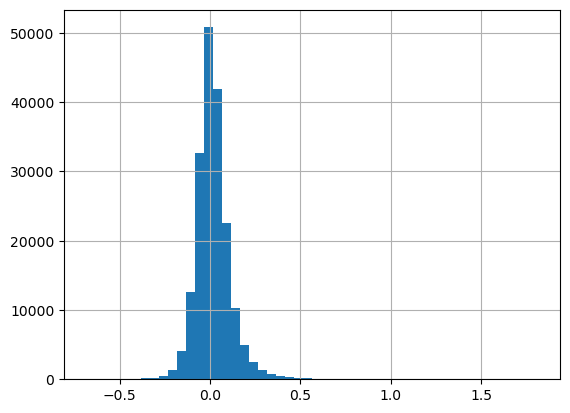

In [39]:
final_df["returns"].hist(bins=50)

<Axes: >

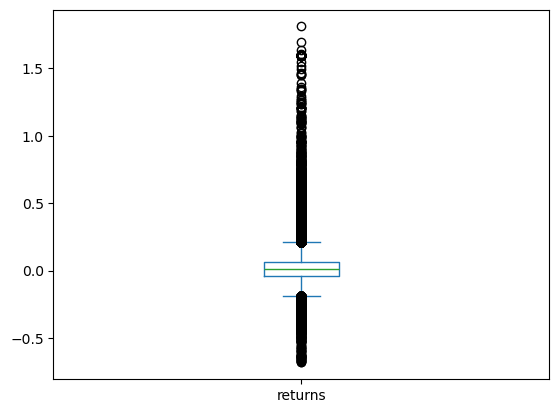

In [40]:
final_df["returns"].plot(kind="box")